In [1]:
import pandas as pd
import numpy as np
import math
import random
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import string

import matplotlib.pyplot as plt
from operator import itemgetter

import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mitchellmyers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mitchellmyers/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Medal DF preprocessing

In [ ]:
#p = 0.02
#df = pd.read_csv('/Users/mitchellmyers/Desktop/MRP_Ryerson/MEDAL_dataset/full_data.csv', skiprows=lambda i: i>0 and random.random() > p)
#df.to_csv('Subsetted_data_02.csv', index=False)

In [2]:
df_subset = pd.read_csv('Subsetted_data_02.csv')

In [3]:
def split_data(df):
    df['LOCATION'] = df['LOCATION'].str.split('|', expand=False)
    df['LOCATION'] = df['LOCATION'].apply(lambda row: list(map(int, row)))
    df['LABEL'] = df['LABEL'].str.split('|', expand=False)
    return df

def remove_puncs(df):
    df['TEXT_processed'] = df.apply(lambda row: row['TEXT'].translate(str.maketrans('','', string.punctuation)) , axis= 1)
    return df

def get_abbrevations(df):
    df['TEXT_processed'] = df.apply(lambda row:[word.upper() if idx in row['LOCATION'] else word.lower() for idx,word in enumerate(row['TEXT_processed'])], axis=1 )
    df['ABV'] = df.apply(lambda row: [row['TEXT_processed'][abv] for abv in row['LOCATION']], axis = 1)
    return df

def split_text(df):
    df['TEXT_processed'] = df.apply(lambda row: row['TEXT_processed'].split(" ") , axis= 1)
    return df

def remove_stopWords(df, stopWords, all_ABVs):
    [stopWords.remove(abv) for abv in all_ABVs if abv in stopWords]
    print(len(stopWords))
    df['TEXT_processed_noStp'] = df.apply(lambda row: [word for word in row['TEXT_processed'] if (word not in stopWords)], axis =1)
    return df

def preprocess_df(df):
    df = split_data(df)
    df = remove_puncs(df)
    df = split_text(df)
    df = get_abbrevations(df)
    all_ABV = list(df['ABV'].explode().unique())
    stp_words = stopwords.words('english')
    df = remove_stopWords(df,stp_words, all_ABV )
    return df

def update_abv_location(df):
    def update_locate(row):
        new_locations = [idx for idx,word in enumerate(row['TEXT_processed_noStp']) if word in row['ABV']]
        return new_locations
    
    df['updated_noStp_LOCATION'] = df.apply(lambda row: update_locate(row), axis=1)
    return df

def update_labelsandABV(df):
    df['LABEL_final'] = df.apply(lambda row: row['LABEL'] * len(row['updated_noStp_LOCATION']) if len(row['updated_noStp_LOCATION']) > len(row['LABEL']) else row['LABEL'],axis=1)
    df['ABV_final'] = df.apply(lambda row: row['ABV'] * len(row['updated_noStp_LOCATION']) if len(row['updated_noStp_LOCATION']) > len(row['ABV']) else row['ABV'], axis=1)

    return df

### Basic pre-processing

In [4]:
medal_df_preprocess = preprocess_df(df_subset)

179


In [6]:
medal_df_preprocess = update_abv_location(medal_df_preprocess)
medal_df_preprocess = update_labelsandABV(medal_df_preprocess)


In [13]:
medal_df = medal_df_preprocess.copy()

In [14]:
medal_df

,TEXT,LOCATION,LABEL,TEXT_processed,ABV,TEXT_processed_noStp,updated_noStp_LOCATION,LABEL_final,ABV_final
0,reduced coenzyme qcytochrome c reductase from ...,"[15, 148, 167, 183]","[vesicles, vesicles, alone, energy]","[reduced, coenzyme, qcytochrome, c, reductase,...","[LDV, LDV, CT, SE]","[reduced, coenzyme, qcytochrome, c, reductase,...","[12, 87, 98, 108]","[vesicles, vesicles, alone, energy]","[LDV, LDV, CT, SE]"
1,lorazepam and mg was compared with pentobarbit...,"[41, 46]","[sodium pentobarbital, quality]","[lorazepam, and, mg, was, compared, with, pent...","[SP, SQ]","[lorazepam, mg, compared, pentobarbital, mg, e...","[23, 26]","[sodium pentobarbital, quality]","[SP, SQ]"
2,the interactions between pancreatic lipase and...,[71],[binding],"[the, interactions, between, pancreatic, lipas...",[IB],"[interactions, pancreatic, lipase, colipase, s...",[37],[binding],[IB]
3,EP techniques have been employed to examine th...,"[0, 45]","[electrophysiological, minutes]","[EP, techniques, have, been, employed, to, exa...","[EP, T2]","[EP, techniques, employed, examine, nature, re...","[0, 28]","[electrophysiological, minutes]","[EP, T2]"
4,AA and tertiary amino homologs of the title co...,[0],[secondary],"[AA, and, tertiary, amino, homologs, of, the, ...",[AA],"[AA, tertiary, amino, homologs, title, compoun...",[0],[secondary],[AA]
...,...,...,...,...,...,...,...,...,...
288075,we study the detention statistics of selfprope...,[75],[active],"[we, study, the, detention, statistics, of, se...",[AS],"[study, detention, statistics, selfpropelling,...",[47],[active],[AS]
288076,the mechanical properties of thermally excited...,"[6, 40]","[twodimensional, study]","[the, mechanical, properties, of, thermally, e...","[2DE, T0]","[mechanical, properties, thermally, excited, 2...","[4, 23]","[twodimensional, study]","[2DE, T0]"
288077,approaches for mapping time series to networks...,[151],[nodes],"[approaches, for, mapping, time, series, to, n...",[NO],"[approaches, mapping, time, series, networks, ...",[102],[nodes],[NO]
288078,inductorcapacitor lc passive wireless sensors ...,[9],[remote sensing],"[inductorcapacitor, lc, passive, wireless, sen...",[RS],"[inductorcapacitor, lc, passive, wireless, sen...",[7],[remote sensing],[RS]


### Limiting max location index and sequence length

In [15]:
def truncate_text(df):
    ids = []
    for i, ls in enumerate(df['updated_noStp_LOCATION']):
        if any( x > 110 for x in ls):
            ids.append(i)

    df.drop(index = ids, inplace=True)
    df.reset_index(drop=True, inplace=True)

    #df['TEXT_clean_nostp'] = df.apply(lambda row: row['TEXT_clean_nostp'][:max(row['updated_noStp_LOCATION']) + 10], axis=1)
    df['TEXT_processed_noStp'] = df.apply(lambda row: row['TEXT_processed_noStp'][:115], axis=1)

    return df

### Keeping top n ABVs and labels. 300 is the number of most frequent ABVs we want and 3.35 is the ratio of labels to ABVs
3.35 was set to keep the ratio equal to full dataset

In [16]:
def take_top_abvlabs(df, abv_count, ratio, max_pop = False):
    
    
    df.reset_index(drop=True, inplace=True)
    allABVs = df['ABV_final'].explode()
    ABV_counts = Counter(allABVs)
    if max_pop:
        top_ABVs = [k for k, v in sorted(ABV_counts.items(), key=lambda item: item[1], reverse=True)][max_pop:abv_count+max_pop]
    else:
        top_ABVs = [k for k, v in sorted(ABV_counts.items(), key=lambda item: item[1], reverse=True)][:abv_count]
    print(len(top_ABVs))

    ids = []
    for i, ls in enumerate(df['ABV_final']):
        if all(x in top_ABVs for x in ls) == False:
            ids.append(i)
    df.drop(index = ids, inplace = True)
    df.reset_index(drop=True, inplace=True)

    allLabs = df['LABEL_final'].explode()
    labs_counts = Counter(allLabs)
    top_labs = [k for k, v in sorted(labs_counts.items(), key=lambda item: item[1], reverse=True) if k not in ['UNSURED SENSE']][:int(abv_count * ratio)]
    print(len(top_labs))

    ids = []
    for i, ls in enumerate(df['LABEL_final']):
        if all(x in top_labs for x in ls) == False:
            ids.append(i)
    df.drop(index = ids, inplace = True)
    df.reset_index(drop=True, inplace=True)

    return df



In [17]:
medal_df = truncate_text(medal_df)
medal_df = take_top_abvlabs(medal_df, 300,3.35)

300
1005


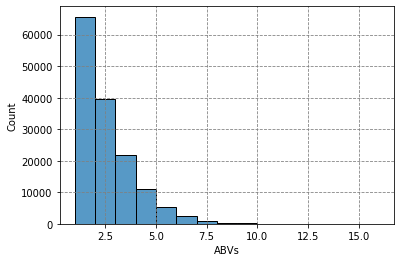

In [46]:
ABV_lens =medal_df['ABV'].apply(len).values
ax = sns.histplot(ABV_lens,binwidth=1)
ax.set(xlabel='ABVs', ylabel='Count' )
from matplotlib import rcParams

rcParams['figure.figsize'] = 8,6
rcParams.update({'font.size': 15})


ax.grid(True, color='gray', linestyle='dashed')

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of Words (No Stop Words)')]

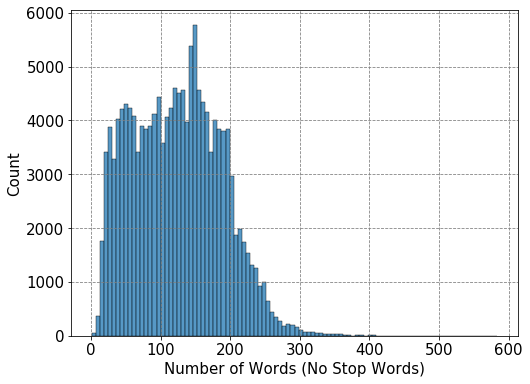

In [48]:
text_lens =medal_df['TEXT_processed'].apply(len).values
ax = sns.histplot(text_lens,bins=100)
#ax.set_axisbelow(True)
ax.grid(True, color='gray', linestyle='dashed')
ax.set(xlabel='Number of Words (No Stop Words)', ylabel='Count')

In [121]:
def abv_lab_graph(df, ticks):
    unique_ABVs = list(df['ABV'].explode().unique())
    sense_ABVs = {i:[] for i in unique_ABVs}

    for row_idx, abv_lst in enumerate(df['ABV'].values):
            for idx,abv in enumerate(abv_lst):
                sense_ABVs[abv].append(df['LABEL'].values[row_idx][idx])
    
    
    sense_abv_freq = {key:Counter(val) for key,val in sense_ABVs.items()}
    sorted_abv_counts =  {k: v for k, v in sorted(sense_abv_freq.items(), key=lambda item: len(item[1]), reverse=True)}
    sense_abv_freq_max = {key + ' : ' +val.most_common(1)[0][0]:val.most_common(1)[0][1] for key,val in sense_abv_freq.items() if key in list(sorted_abv_counts.keys())[:20]}

    x,y=map(list,zip(*Counter(sense_abv_freq_max).most_common(20)))
    ax = sns.barplot(x=y,y=x)
    ax.set(ylabel='ABV : Top Label', xlabel='Count')
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, ticks))
    

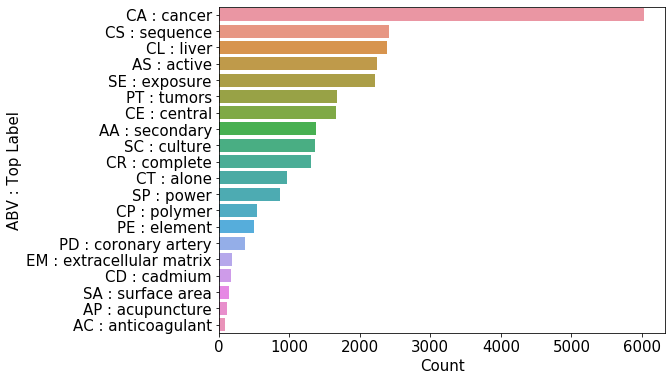

In [55]:
abv_lab_graph(medal_df, 1000)

### To get MeDAL-500

In [10]:
def reduce_instances(df, count=500):
    labs_counts = Counter(df.LABEL_final.explode())
    ids = []
    for i, lst in enumerate(df.LABEL_final):
        if all(labs_counts[y] > 500 for y in lst) == True:
            ids.append(i)
            for lab in lst:
                labs_counts[lab] -= 1


    df.drop(index=ids, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [18]:
medal_df_500 = reduce_instances(medal_df)

In [19]:
medal_df_500

,TEXT,LOCATION,LABEL,TEXT_processed,ABV,TEXT_processed_noStp,updated_noStp_LOCATION,LABEL_final,ABV_final
0,reduced coenzyme qcytochrome c reductase from ...,"[15, 148, 167, 183]","[vesicles, vesicles, alone, energy]","[reduced, coenzyme, qcytochrome, c, reductase,...","[LDV, LDV, CT, SE]","[reduced, coenzyme, qcytochrome, c, reductase,...","[12, 87, 98, 108]","[vesicles, vesicles, alone, energy]","[LDV, LDV, CT, SE]"
1,EP techniques have been employed to examine th...,"[0, 45]","[electrophysiological, minutes]","[EP, techniques, have, been, employed, to, exa...","[EP, T2]","[EP, techniques, employed, examine, nature, re...","[0, 28]","[electrophysiological, minutes]","[EP, T2]"
2,the excretion of the enzyme gammaglutamyltrans...,[77],[necrosis],"[the, excretion, of, the, enzyme, gammaglutamy...",[CN],"[excretion, enzyme, gammaglutamyltranspeptidas...",[39],[necrosis],[CN]
3,peptidases activities were compared in human l...,"[23, 32]","[active, alkaline]","[peptidases, activities, were, compared, in, h...","[AS, ALP]","[peptidases, activities, compared, human, leuc...","[14, 19]","[active, alkaline]","[AS, ALP]"
4,activity in all three known conducting systems...,[70],[pulse],"[activity, in, all, three, known, conducting, ...",[PP],"[activity, three, known, conducting, systems, ...",[43],[pulse],[PP]
...,...,...,...,...,...,...,...,...,...
73191,there has been a tremendous effort in accessin...,"[27, 56]","[relaxation, twodimensional]","[there, has, been, a, tremendous, effort, in, ...","[EC50, 2DE]","[tremendous, effort, accessing, liquidphase, s...","[16, 37]","[relaxation, twodimensional]","[EC50, 2DE]"
73192,the glass transition and the binodals of asymm...,"[16, 62, 118, 127]","[approach, agreement, effective, effective]","[the, glass, transition, and, the, binodals, o...","[RPA, PA, ERP, ERP]","[glass, transition, binodals, asymmetric, bina...","[9, 38, 68, 74]","[approach, agreement, effective, effective]","[RPA, PA, ERP, ERP]"
73193,the mechanical properties of thermally excited...,"[6, 40]","[twodimensional, study]","[the, mechanical, properties, of, thermally, e...","[2DE, T0]","[mechanical, properties, thermally, excited, 2...","[4, 23]","[twodimensional, study]","[2DE, T0]"
73194,approaches for mapping time series to networks...,[151],[nodes],"[approaches, for, mapping, time, series, to, n...",[NO],"[approaches, mapping, time, series, networks, ...",[102],[nodes],[NO]


## UMN DF preprocessing

In [125]:
col_names = ['ABV', 'LABEL', 'ABV_in_Text', 'Start_Position', 'End_Position', 'Section_Info', 'Text']
umn_df = pd.read_csv('/Users/mitchellmyers/Desktop/MRP_Ryerson/AnonymizedClinicalAbbreviationsAndAcronymsDataSet.txt', delimiter='|', encoding='cp1252', header=None, names= col_names)
umn_df = umn_df.dropna(subset=['Text', 'ABV'])
umn_df

,ABV,LABEL,ABV_in_Text,Start_Position,End_Position,Section_Info,Text
0,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...
1,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...
2,AB,abortion,AB,223.0,224.0,PAST OB HISTORY,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...
3,AB,abortion,AB.,194.0,196.0,HISTORY OF THE PRESENT ILLNESS,She had a pelvic ultrasound at Park Nicollet o...
4,AB,abortion,AB,114.0,115.0,PAST OB-GYN HISTORY,"On _%#MMDD2007#%_, normal anatomy with anterio..."
...,...,...,...,...,...,...,...
37495,VAD,vincristine adriamycin and dexamethasone,VAD.,139.0,142.0,PAST MEDICAL HISTORY,"1. Multiple myeloma, undergoing chemotherapy. ..."
37496,VAD,vincristine adriamycin and dexamethasone,"VAD,",172.0,175.0,IMPRESSION,He has been receiving weekly Procrit injection...
37497,VAD,vincristine adriamycin and dexamethasone,VAD,250.0,252.0,HISTORY OF PRESENT ILLNESS,"Within a month, he developed recurrent hip pai..."
37498,VAD,vincristine adriamycin and dexamethasone,VAD,181.0,183.0,HISTORY OF PRESENT ILLNESS,He had a serum protein electrophoresis with a ...


In [126]:
def clean_text(df):
    df['TEXT_processed'] = df.apply(lambda row:re.sub('(_%#).*?(#%_)', '', row['Text']), axis=1)
    #df['TEXT_clean'] = df.apply(lambda row:re.sub('[^A-Za-z0-9]+', ' ', row['TEXT_clean']), axis=1)
    df['ABV'] = df.apply(lambda row:re.sub('[^A-Za-z0-9]+', '', row['ABV']), axis=1)  
    return df

def remove_puncs(df):
    df['TEXT_processed'] = df.apply(lambda row: row['TEXT_processed'].translate(str.maketrans(' ',' ', string.punctuation)) , axis= 1)
    return df

def split_text(df):
    df['TEXT_processed'] = df.apply(lambda row: row['TEXT_processed'].split(" ") , axis= 1)
    df['TEXT_processed'] = df.apply(lambda row:[w for w in row['TEXT_processed'] if w != ''], axis=1)

    return df

def remove_stopWords(df, stopWords, all_ABVs):
    [stopWords.remove(abv) for abv in all_ABVs if abv in stopWords]
    df['TEXT_processed_noStp'] = df.apply(lambda row: [word for word in row['TEXT_processed'] if word.lower() not in stopWords], axis =1)
    
    return df

def get_ABV_location(df):
    def locate(row):
        for idx,word in enumerate(row['TEXT_processed']):
            if word == row['ABV']:
                return idx

    df['LOCATION'] = df.apply(lambda row: locate(row), axis=1)
    return df

def make_tolist(df):
    df['LOCATION'] = df.apply(lambda row: list([int(row['LOCATION'])]) if type(row['LOCATION']) == float else row['LOCATION'], axis=1)
    df['LABEL'] = df.apply(lambda row: list([row['LABEL']]) if type(row['LABEL']) == str else row['LABEL'], axis=1)
    df['ABV'] = df.apply(lambda row: list([row['ABV']]) if type(row['ABV']) == str else row['ABV'], axis=1)
    return df


def preprocess_df(df):
    all_ABV = list(df['ABV'].explode().unique())
    df = clean_text(df)
    df = remove_puncs(df)
    df = split_text(df)
    stp_words = stopwords.words('english')
    df = remove_stopWords(df,stp_words, all_ABV)
    df = get_ABV_location(df)
    
    return df

In [127]:
umn_df = preprocess_df(umn_df)
umn_df = umn_df.dropna(subset=['LOCATION'])

In [128]:
umn_df.reset_index(drop=True, inplace=True)
umn_df

,ABV,LABEL,ABV_in_Text,Start_Position,End_Position,Section_Info,Text,TEXT_processed,TEXT_processed_noStp,LOCATION
0,AB,abortion,AB.,231.0,233.0,NaN,_%#NAME#%_ _%#NAME#%_ is a 29-year-old gravida...,"[is, a, 29yearold, gravida, 3, para, 2002, who...","[29yearold, gravida, 3, para, 2002, presented,...",34.0
1,AB,abortion,AB.,249.0,251.0,NaN,She is now bleeding quite heavily. Ultrasound ...,"[She, is, now, bleeding, quite, heavily, Ultra...","[bleeding, quite, heavily, Ultrasound, morning...",12.0
2,AB,abortion,AB,223.0,224.0,PAST OB HISTORY,ALLERGIES: Heparin and Imitrex. PAST OB HISTOR...,"[ALLERGIES, Heparin, and, Imitrex, PAST, OB, H...","[ALLERGIES, Heparin, Imitrex, PAST, OB, HISTOR...",32.0
3,AB,abortion,AB.,194.0,196.0,HISTORY OF THE PRESENT ILLNESS,She had a pelvic ultrasound at Park Nicollet o...,"[She, had, a, pelvic, ultrasound, at, Park, Ni...","[pelvic, ultrasound, Park, Nicollet, showed, s...",32.0
4,AB,abortion,AB,114.0,115.0,PAST OB-GYN HISTORY,"On _%#MMDD2007#%_, normal anatomy with anterio...","[On, normal, anatomy, with, anterior, placenta...","[normal, anatomy, anterior, placenta, evidence...",15.0
...,...,...,...,...,...,...,...,...,...,...
36951,VAD,vincristine adriamycin and dexamethasone,VAD.,139.0,142.0,PAST MEDICAL HISTORY,"1. Multiple myeloma, undergoing chemotherapy. ...","[1, Multiple, myeloma, undergoing, chemotherap...","[1, Multiple, myeloma, undergoing, chemotherap...",19.0
36952,VAD,vincristine adriamycin and dexamethasone,"VAD,",172.0,175.0,IMPRESSION,He has been receiving weekly Procrit injection...,"[He, has, been, receiving, weekly, Procrit, in...","[receiving, weekly, Procrit, injections, Serum...",27.0
36953,VAD,vincristine adriamycin and dexamethasone,VAD,250.0,252.0,HISTORY OF PRESENT ILLNESS,"Within a month, he developed recurrent hip pai...","[Within, a, month, he, developed, recurrent, h...","[Within, month, developed, recurrent, hip, pai...",38.0
36954,VAD,vincristine adriamycin and dexamethasone,VAD,181.0,183.0,HISTORY OF PRESENT ILLNESS,He had a serum protein electrophoresis with a ...,"[He, had, a, serum, protein, electrophoresis, ...","[serum, protein, electrophoresis, protein, 103...",32.0


In [ ]:
umn_df = make_tolist(umn_df)
umn_df = update_abv_location(umn_df)

### Dropping any instances that can not find the location of the ABV

In [ ]:
c = []
for i,ls in enumerate(umn_df['updated_noStp_LOCATION']):
    if ls == []:
        c.append(i)
umn_df.drop(index=c, inplace=True)
umn_df.reset_index(drop=True, inplace=True)

### We also truncate the text using the same function as MeDAL

In [ ]:
umn_df = truncate_text(umn_df)
umn_df = update_labelsandABV(umn_df)


### Due to the smaller label count compared to MeDAL, we do not specify an ABV count or ratio but just a minimum number of training examples. Here it is set to 5

In [133]:
def take_frequent_labs_only(df, min_examples = 5):
    df.reset_index(drop=True, inplace=True)
    allLabs = df.LABEL_final.explode()
    labs_counts = Counter(allLabs)
    top_labs_counts = [k for k, v in labs_counts.items() if v >= min_examples and k not in ['UNSURED SENSE']]
    print(len(top_labs_counts))

    ids = []
    for i, ls in enumerate(df['LABEL_final']):
        if all(x in top_labs_counts for x in ls) == False:
            ids.append(i)
    df.drop(index = ids, inplace = True)
    df.reset_index(drop=True, inplace=True)

    return df



In [ ]:
umn_df = take_frequent_labs_only(umn_df)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Number of Words (No Stop Words)')]

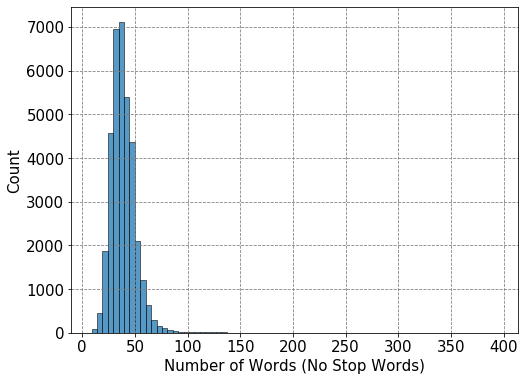

In [118]:
text_lens =umn_df['TEXT_processed_noStp'].apply(len).values
ax = sns.histplot(text_lens,bins=75)
#ax.set_axisbelow(True)
ax.grid(True, color='gray', linestyle='dashed')
ax.set(xlabel='Number of Words (No Stop Words)', ylabel='Count')

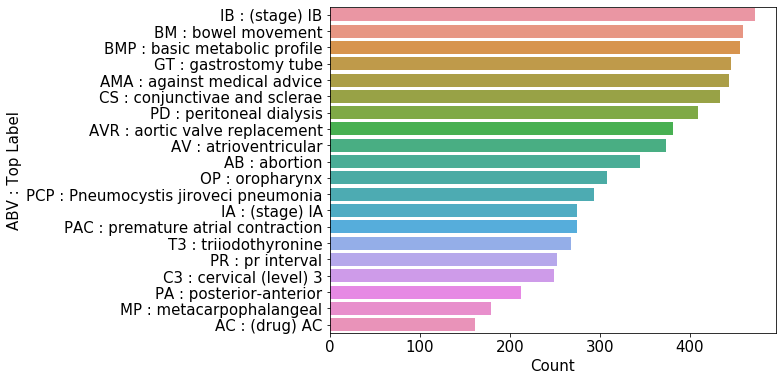

In [123]:
abv_lab_graph(umn_df,100)

## Prep data for NER

In [140]:
def make_NER(df):
    unique_labels = df.LABEL_final.explode().unique()
    print(len(unique_labels))

    unique_labels = np.append(unique_labels,'NA_word')
    words_index = list(unique_labels).index('NA_word')

    def create_NER(df):
        def NER(row):
            out = [words_index] * (len(row.TEXT_processed_noStp))
            
            for id,loc in enumerate(row.updated_noStp_LOCATION):
                lab = row.LABEL_final[id]
                lab_idx = list(unique_labels).index(lab)
                out[loc] = lab_idx 

            return out
        df['NER_labels'] = df.apply(lambda row: NER(row), axis=1 )
        return df

    df_wNER = create_NER(df)


    def create_NER_actual_labs(df):
        def NER_words(row):
            out = ['NA_word'] * (len(row.TEXT_processed_noStp))
            
            for id,loc in enumerate(row.updated_noStp_LOCATION):
                lab = row.LABEL_final[id]
                #lab_idx = list(unique_labels).index(lab)
                out[loc] = lab 

            return out
        df['NER_labels_words'] = df.apply(lambda row: NER_words(row), axis=1 )
        return df

    df_wNER = create_NER_actual_labs(df_wNER)

    return df_wNER

In [ ]:
medal_df_ner = make_NER(medal_df)
print('done')
umn_df_ner = make_NER(umn_df)

In [144]:
medal_df_ner = medal_df_ner[['TEXT_processed_noStp',	'updated_noStp_LOCATION',	'LABEL_final',	'ABV_final',	'NER_labels',	'NER_labels_words']]
umn_df_ner = umn_df_ner[['TEXT_processed_noStp',	'updated_noStp_LOCATION',	'LABEL_final',	'ABV_final',	'NER_labels',	'NER_labels_words']]

## Additional Notes:

- To create the 40-lab datasets, we just call the take_top_abvlabs function on each dataset and only take the top 40 labels, and keep the ratio at 3.35
- I saved data to parquet files to maintain data integrity
- Dataset names can be found in HuggingFace_dataset_creation file